# Generate simulated reads

## In brief

Simulate reads as a NanopolishComp like file from a fasta file and an inbuild model.

...

### Import the package and plotting tools

In [1]:
from nanocompore.SimReads import SimReads

# Ploting lib imports
import matplotlib.pyplot as pl
%matplotlib inline

### Generate reads without modifications

2020-12-08 11:20:48.610 | INFO     | nanocompore.SimReads:SimReads:90 - Checking and initialising Simreads
2020-12-08 11:20:48.613 | DEBUG    | nanocompore.common:log_init_state:50 - 	package_name: nanocompore
2020-12-08 11:20:48.615 | DEBUG    | nanocompore.common:log_init_state:51 - 	package_version: 1.0.1.dev0
2020-12-08 11:20:48.619 | DEBUG    | nanocompore.common:log_init_state:52 - 	timestamp: 2020-12-08 11:20:48.619541
2020-12-08 11:20:48.620 | DEBUG    | nanocompore.common:log_init_state:55 - 	fasta_fn: ./references/simulated/ref.fa
2020-12-08 11:20:48.622 | DEBUG    | nanocompore.common:log_init_state:55 - 	outpath: ./results/
2020-12-08 11:20:48.623 | DEBUG    | nanocompore.common:log_init_state:55 - 	outprefix: out
2020-12-08 11:20:48.625 | DEBUG    | nanocompore.common:log_init_state:55 - 	overwrite: True
2020-12-08 11:20:48.626 | DEBUG    | nanocompore.common:log_init_state:55 - 	run_type: RNA
2020-12-08 11:20:48.627 | DEBUG    | nanocompore.common:log_init_state:55 - 	ref

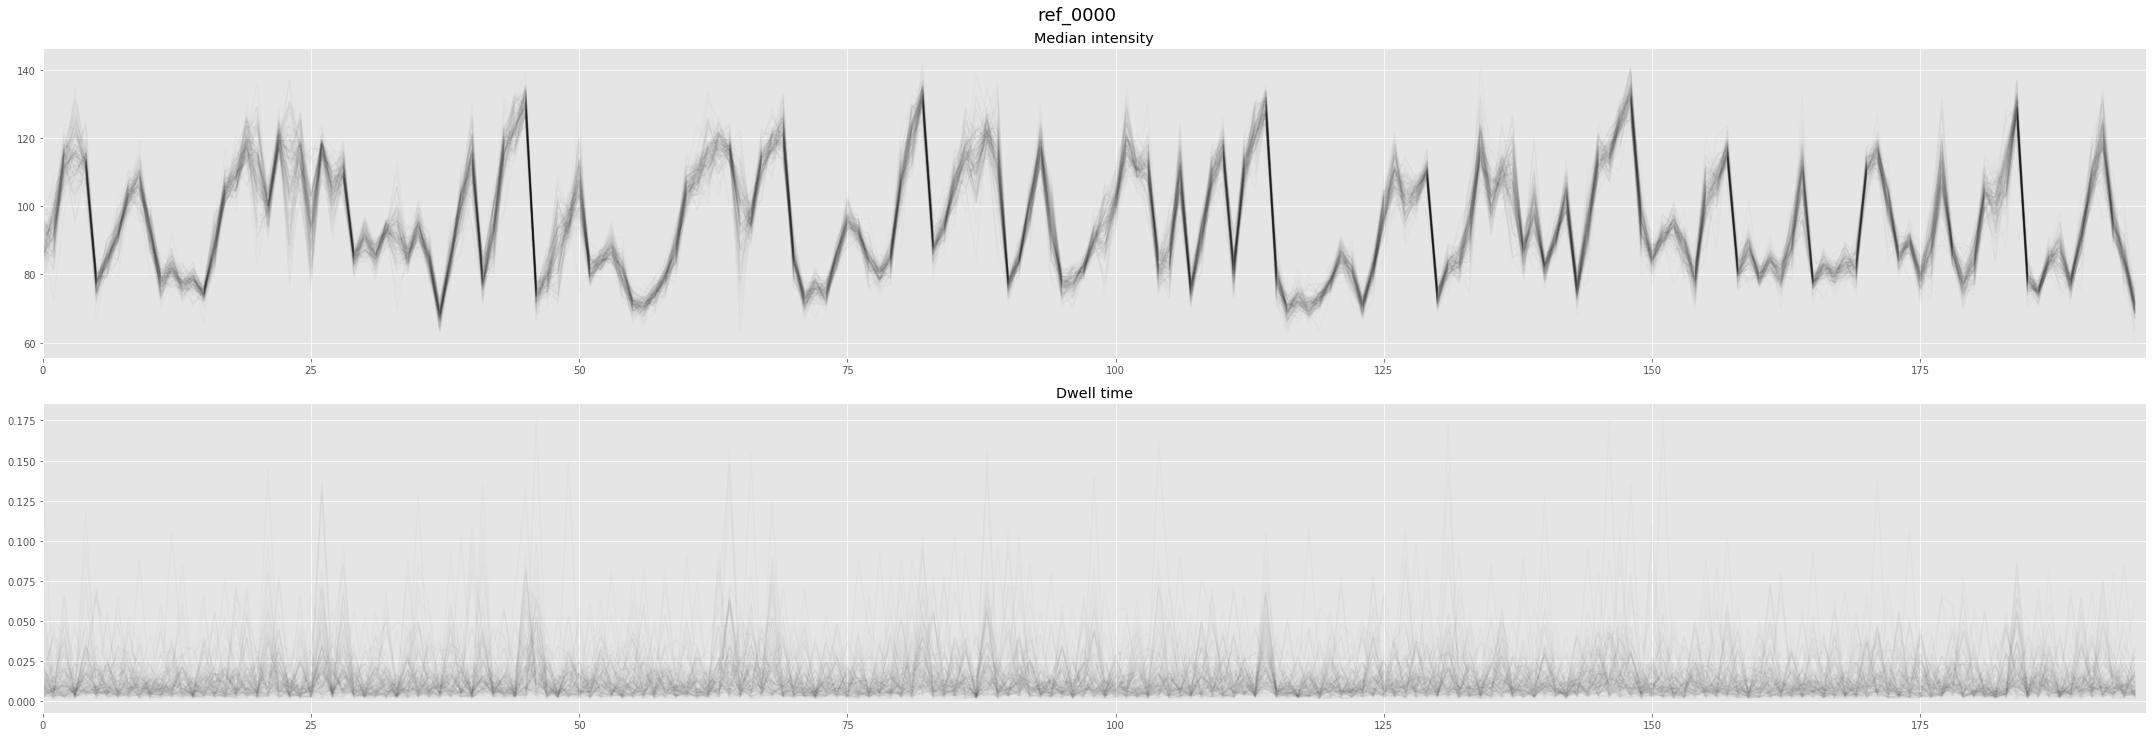

In [2]:
SimReads (
    fasta_fn="./references/simulated/ref.fa",
    ref_list=["ref_0000"],
    outpath="./results/",
    overwrite="True",
    plot=True,
    nreads_per_ref=100)

2020-12-08 11:20:55.001 | INFO     | nanocompore.SimReads:SimReads:90 - Checking and initialising Simreads
2020-12-08 11:20:55.005 | DEBUG    | nanocompore.common:log_init_state:50 - 	package_name: nanocompore
2020-12-08 11:20:55.006 | DEBUG    | nanocompore.common:log_init_state:51 - 	package_version: 1.0.1.dev0
2020-12-08 11:20:55.008 | DEBUG    | nanocompore.common:log_init_state:52 - 	timestamp: 2020-12-08 11:20:55.008532
2020-12-08 11:20:55.009 | DEBUG    | nanocompore.common:log_init_state:55 - 	fasta_fn: ./references/simulated/ref.fa
2020-12-08 11:20:55.010 | DEBUG    | nanocompore.common:log_init_state:55 - 	outpath: ./results/
2020-12-08 11:20:55.011 | DEBUG    | nanocompore.common:log_init_state:55 - 	outprefix: out
2020-12-08 11:20:55.012 | DEBUG    | nanocompore.common:log_init_state:55 - 	overwrite: True
2020-12-08 11:20:55.013 | DEBUG    | nanocompore.common:log_init_state:55 - 	run_type: RNA
2020-12-08 11:20:55.013 | DEBUG    | nanocompore.common:log_init_state:55 - 	ref

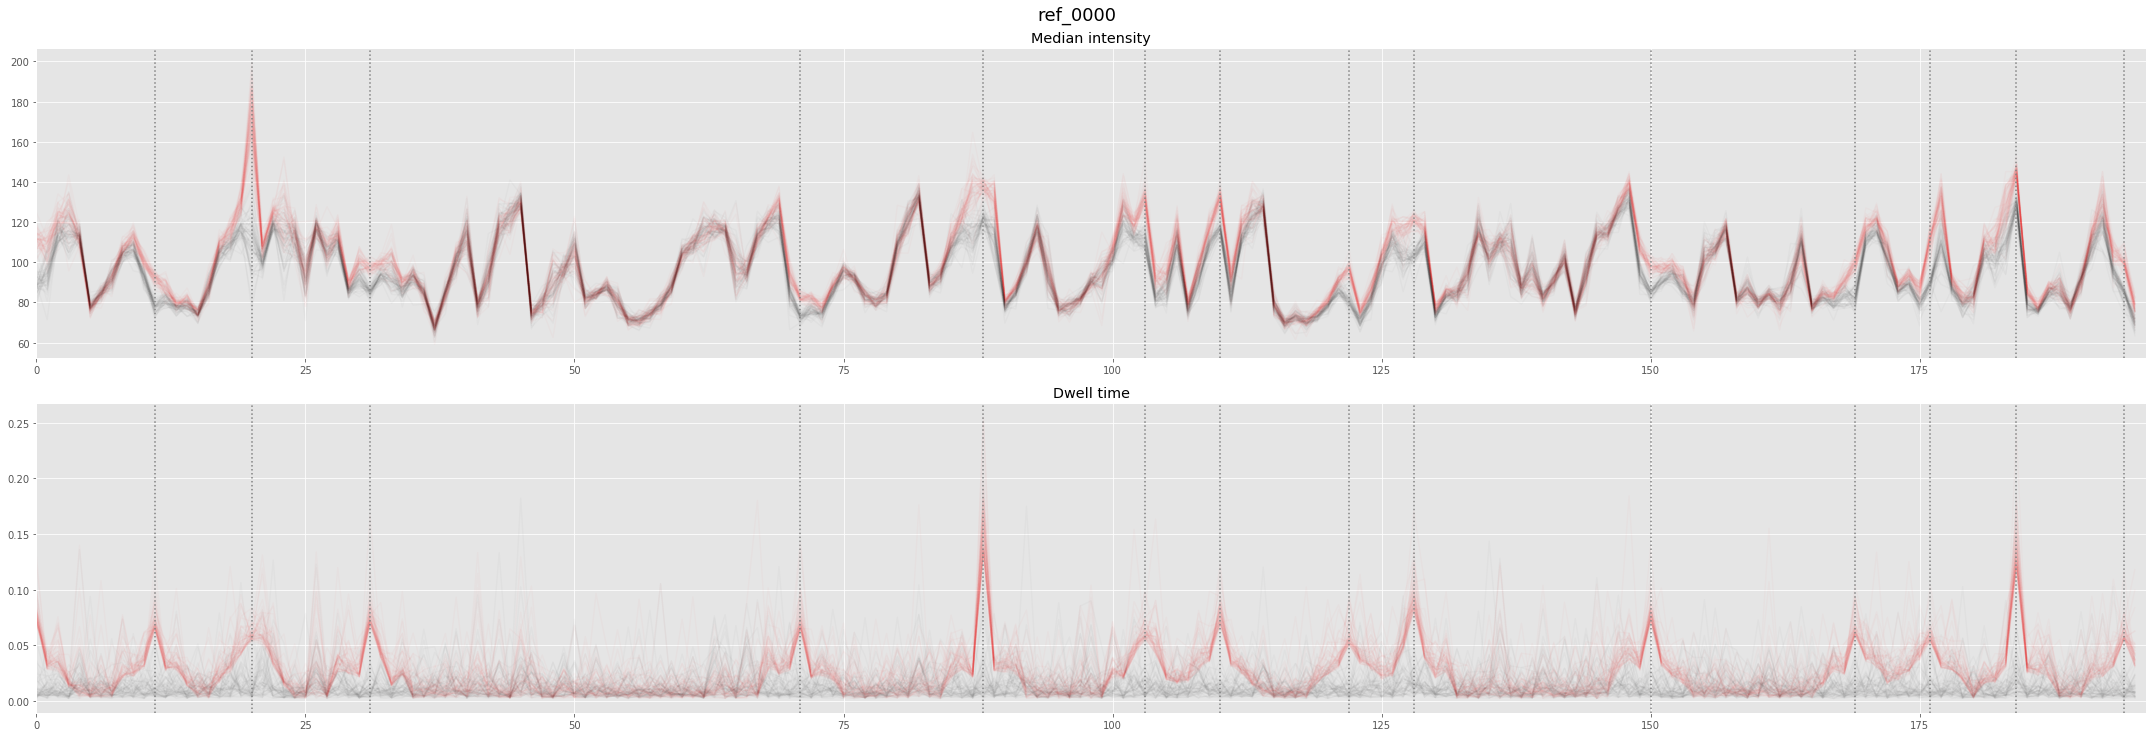

In [3]:
SimReads (
    fasta_fn="./references/simulated/ref.fa",
    ref_list=["ref_0000"],
    outpath="./results/",
    overwrite="True",
    plot=True,
    mod_extend_context=3,
    nreads_per_ref=100,
    intensity_mod=5,
    dwell_mod=5,
    mod_reads_freq=0.5)

### Generate a small dataset with both modified and unmodified conditions

In [4]:
# Options
fasta = "./references/simulated/ref.fa"
data_dir = "./eventalign_files/simulated/"

for replicate, nreads in [(1, 55), (2, 60)]:
    # Generate non modified control
    SimReads (
        fasta_fn=fasta,
        outpath=data_dir,
        outprefix=f"unmodified_rep_{replicate}",
        overwrite=True,
        nreads_per_ref= nreads)
    
    # Generate modified control
    SimReads (
        fasta_fn=fasta,
        outpath=data_dir,
        outprefix=f"modified_rep_{replicate}",
        overwrite=True,
        nreads_per_ref= nreads,
        intensity_mod=3,
        dwell_mod=3,
        mod_reads_freq=0.9,
        mod_bases_freq = 0.25,
        pos_rand_seed=2)

2020-12-08 11:21:01.498 | INFO     | nanocompore.SimReads:SimReads:90 - Checking and initialising Simreads
2020-12-08 11:21:01.501 | DEBUG    | nanocompore.common:log_init_state:50 - 	package_name: nanocompore
2020-12-08 11:21:01.502 | DEBUG    | nanocompore.common:log_init_state:51 - 	package_version: 1.0.1.dev0
2020-12-08 11:21:01.503 | DEBUG    | nanocompore.common:log_init_state:52 - 	timestamp: 2020-12-08 11:21:01.503063
2020-12-08 11:21:01.512 | DEBUG    | nanocompore.common:log_init_state:55 - 	fasta_fn: ./references/simulated/ref.fa
2020-12-08 11:21:01.514 | DEBUG    | nanocompore.common:log_init_state:55 - 	outpath: ./eventalign_files/simulated/
2020-12-08 11:21:01.515 | DEBUG    | nanocompore.common:log_init_state:55 - 	outprefix: unmodified_rep_1
2020-12-08 11:21:01.516 | DEBUG    | nanocompore.common:log_init_state:55 - 	overwrite: True
2020-12-08 11:21:01.517 | DEBUG    | nanocompore.common:log_init_state:55 - 	run_type: RNA
2020-12-08 11:21:01.517 | DEBUG    | nanocompore

2020-12-08 11:21:04.301 | DEBUG    | nanocompore.common:log_init_state:55 - 	fasta_fn: ./references/simulated/ref.fa
2020-12-08 11:21:04.303 | DEBUG    | nanocompore.common:log_init_state:55 - 	outpath: ./eventalign_files/simulated/
2020-12-08 11:21:04.303 | DEBUG    | nanocompore.common:log_init_state:55 - 	outprefix: unmodified_rep_2
2020-12-08 11:21:04.304 | DEBUG    | nanocompore.common:log_init_state:55 - 	overwrite: True
2020-12-08 11:21:04.305 | DEBUG    | nanocompore.common:log_init_state:55 - 	run_type: RNA
2020-12-08 11:21:04.306 | DEBUG    | nanocompore.common:log_init_state:55 - 	ref_list: []
2020-12-08 11:21:04.307 | DEBUG    | nanocompore.common:log_init_state:55 - 	nreads_per_ref: 60
2020-12-08 11:21:04.307 | DEBUG    | nanocompore.common:log_init_state:55 - 	plot: False
2020-12-08 11:21:04.308 | DEBUG    | nanocompore.common:log_init_state:55 - 	intensity_mod: 0
2020-12-08 11:21:04.310 | DEBUG    | nanocompore.common:log_init_state:55 - 	dwell_mod: 0
2020-12-08 11:21:04

## Full CLI and API documentations

### API documentation

API help can be obtained with conventional python methods (help or ?) or rendered nicely in Jupyter with the jhelp function from nanocompore

In [5]:
from nanocompore.SimReads import SimReads
from nanocompore.common import jhelp
jhelp(SimReads)

**SimReads** (fasta_fn, outpath, outprefix, overwrite, run_type, ref_list, nreads_per_ref, plot, intensity_mod, dwell_mod, mod_reads_freq, mod_bases_freq, mod_bases_type, mod_extend_context, min_mod_dist, pos_rand_seed, data_rand_seed, not_bound, progress)

Simulate reads in a NanopolishComp like file from a fasta file and an inbuild model.
The simulated reads correspond to the sequences provided in the fasta file and follow
the intensity and dwell time from the corresponding model (RNA or DNA).

---

* **fasta_fn** (required) [str]

Fasta file containing references to use to generate artificial reads.

* **outpath** (default: ./) [str]

Path to the output folder.

* **outprefix** (default: out) [str]

text outprefix for all the files generated by the function.

* **overwrite** (default: False) [bool]

If the output directory already exists, the standard behaviour is to raise an error to prevent overwriting existing data This option ignore the error and overwrite data if they have the same outpath and outprefix.

* **run_type** (default: RNA) [str]

Define the run type model to import {RNA,DNA}

* **ref_list** (default: []) [list]

Restrict the references to the listed IDs.

* **nreads_per_ref** (default: 100) [int]

Number of reads to generate per references.

* **plot** (default: False) [bool]

If true, generate an interactive plot of the trace generated.

* **intensity_mod** (default: 0) [float]

Fraction of intensity distribution SD by which to modify the intensity distribution loc value.

* **dwell_mod** (default: 0) [float]

Fraction of dwell time distribution SD by which to modify the intensity distribution loc value.

* **mod_reads_freq** (default: 0) [float]

Frequency of reads to modify.

* **mod_bases_freq** (default: 0.25) [float]

Frequency of bases to modify in each read (if possible).

* **mod_bases_type** (default: A) [str]

Base for which to modify the signal. {A,T,C,G}

* **mod_extend_context** (default: 2) [int]

number of adjacent base affected by the signal modification following an harmonic series.

* **min_mod_dist** (default: 6) [int]

Minimal distance between 2 bases to modify.

* **pos_rand_seed** (default: 42) [int]

Define a seed for randon position picking to get a deterministic behaviour.

* **data_rand_seed** (default: None) [int]

Define a seed for generating the data. If None (default) the seed is drawn from /dev/urandom.

* **not_bound** (default: False) [bool]

Do not bind the values generated by the distributions to the observed min and max observed values from the model file.

* **progress** (default: False) [bool]

Display a progress bar during execution



### CLI documentation 

```bash
nanocompore simreads --help
```

```text
usage: nanocompore simreads [-h] --fasta FASTA [--intensity_mod INTENSITY_MOD]
                            [--dwell_mod DWELL_MOD]
                            [--mod_reads_freq MOD_READS_FREQ]
                            [--mod_bases_freq MOD_BASES_FREQ]
                            [--mod_bases_type {A,T,C,G}]
                            [--mod_extend_context MOD_EXTEND_CONTEXT]
                            [--min_mod_dist MIN_MOD_DIST]
                            [--run_type {RNA,DNA}]
                            [--nreads_per_ref NREADS_PER_REF]
                            [--pos_rand_seed POS_RAND_SEED] [--not_bound]
                            [--outpath OUTPATH] [--outprefix OUTPREFIX]
                            [--overwrite] [--log_level {warning,info,debug}]
                            [--progress]

Simulate reads as a NanopolishComp like file from a fasta file and an inbuild model

* Minimal example without model alteration
    nanocompore simreads -f ref.fa -o results -n 50

* Minimal example with alteration of model intensity loc parameter for 50% of the reads
nanocompore simreads -f ref.fa -o results -n 50 --intensity_mod 2 --mod_reads_freq 0.5 --mod_bases_freq 0.2

optional arguments:
  -h, --help            show this help message and exit

Input options:
  --fasta FASTA, -f FASTA
                        Fasta file containing references to use to generate
                        artificial reads

Signal modification options:
  --intensity_mod INTENSITY_MOD
                        Fraction of intensity distribution SD by which to
                        modify the intensity distribution loc value (default:
                        0)
  --dwell_mod DWELL_MOD
                        Fraction of dwell time distribution SD by which to
                        modify the intensity distribution loc value (default:
                        0)
  --mod_reads_freq MOD_READS_FREQ
                        Frequency of reads to modify (default: 0)
  --mod_bases_freq MOD_BASES_FREQ
                        Frequency of bases to modify in each read (if
                        possible) (default: 0.25)
  --mod_bases_type {A,T,C,G}
                        Base for which to modify the signal (default: A)
  --mod_extend_context MOD_EXTEND_CONTEXT
                        number of adjacent base affected by the signal
                        modification following an harmonic series (default: 2)
  --min_mod_dist MIN_MOD_DIST
                        Minimal distance between 2 bases to modify (default:
                        6)

Other options:
  --run_type {RNA,DNA}  Define the run type model to import (default: RNA)
  --nreads_per_ref NREADS_PER_REF, -n NREADS_PER_REF
                        Number of reads to generate per references (default:
                        100)
  --pos_rand_seed POS_RAND_SEED
                        Define a seed for randon position picking to get a
                        deterministic behaviour (default: 42)
  --not_bound           Do not bind the values generated by the distributions
                        to the observed min and max observed values from the
                        model file (default: False)

Output options:
  --outpath OUTPATH, -o OUTPATH
                        Path to the output folder (default: ./)
  --outprefix OUTPREFIX, -p OUTPREFIX
                        text outprefix for all the files generated (default:
                        out)
  --overwrite, -w       Use --outpath even if it exists already (default:
                        False)

Verbosity options:
  --log_level {warning,info,debug}
                        Set the log level (default: info)
  --progress            Display a progress bar during execution (default:
                        False)
```